In [1]:
import pandas as pd
from sklearn import *
def preprocess(file,size_of_test):
    # read the csv
    data = pd.read_table(file, sep=',', index_col=None)

#     print('Shape of DataFrame: {}'.format(data.shape))
    
    
    # drop unwanted columns
    data = data.drop(['Qchat-10-Score','Ethnicity', 'Case_No'], axis = 1)

    # create X and Y datasets for training
    x = data.drop(['Class/ASD Traits'],1)
    y = data['Class/ASD Traits']

    
    train, test = model_selection.train_test_split(data, test_size=size_of_test, random_state = 1)
#     print(X_train.loc[:1])
    return train, test

In [2]:
train, test = preprocess('../dataset/Toddler Autism dataset July 2018.csv', 0.25)

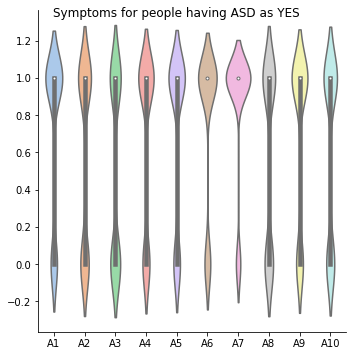

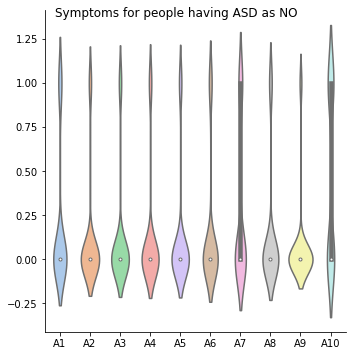

In [3]:
#code taken from https://www.kaggle.com/stap20/asd-toddler-data-experiment

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize = (10,10))
data = train
bin_data=pd.DataFrame.copy(data)
bin_data = bin_data[bin_data['Class/ASD Traits'] == "Yes"]
bin_data = bin_data.drop(["Age_Mons"], axis=1)
p=sns.catplot(data=bin_data, kind="violin", split = True, palette="pastel")
p.fig.suptitle("Symptoms for people having ASD as YES")
plt.show()
bin_data=pd.DataFrame.copy(data)
bin_data = bin_data[bin_data['Class/ASD Traits'] == "No"]
bin_data = bin_data.drop(["Age_Mons"], axis=1)
p=sns.catplot(data=bin_data, kind="violin", split = True, palette="pastel")
p.fig.suptitle("Symptoms for people having ASD as NO")
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

data = train
X = data.drop(['Class/ASD Traits'], axis = 1)
y = data['Class/ASD Traits'].apply(lambda x:1 if x=="Yes" else 0)

X = pd.get_dummies(X)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Class/ASD Traits   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     95.78
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          1.69e-182
Time:                        18:20:08   Log-Likelihood:                -55.658
No. Observations:                 790   AIC:                             149.3
Df Residuals:                     771   BIC:                             238.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\Users\Faraz Ahmed Khan\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


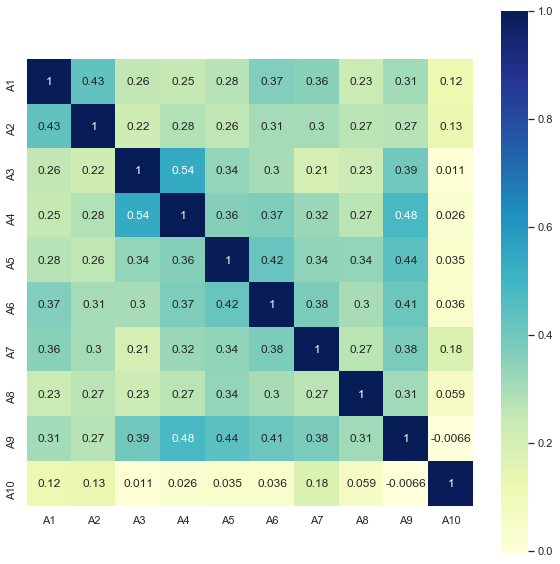

In [5]:
co_or_data = data.drop(["Age_Mons"], axis = 1)
corr = co_or_data.corr()
sns.set()
plt.figure(figsize = (10,10))
plot = sns.heatmap(data = corr, annot = True, square = True, cbar = True, cmap="YlGnBu")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


In [29]:
label_prob = 0.7
Variables_to_take_out = 2


#reading data and splitting into train and test set.
data = pd.read_table('../dataset/Toddler Autism dataset July 2018.csv', sep=',', index_col=None)
data = data.drop(['Qchat-10-Score',  'Case_No', 'Age_Mons', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test'], axis=1)
data['Class/ASD Traits'] = data['Class/ASD Traits'].apply(lambda x:1 if x=="Yes" else 0)
COL_NAMES = list(data.columns)
data = data.astype('float64') 
train, test = model_selection.train_test_split(data, test_size=0.25, random_state = 1)

def make_graph_from_tuples(tuples):
    graph = nx.DiGraph()
    for i in range(len(model.structure)):
        for j in (model.structure[i]):
            graph.add_edge(j, i)
    return graph

def draw_graph(graph, title = "graph", re_label = True):
    if re_label:
        mapping = {i:COL_NAMES[i] for i in range(len(COL_NAMES))}
        nx.relabel_nodes(graph, mapping, copy=False)
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos, with_labels = True)
    plt.title(title)
    plt.show()
    

    
def test_accuracy(model, data):
    final_predictions_actual = []
    final_predictions_model = []
    test = data.copy(deep = True)
    for row in test.iterrows():
        to_pred = []
        label = random.random() < label_prob #including the label with RHS
        if label:
            to_pred.append(len(COL_NAMES)-1)
            final_predictions_actual.append(row[1].values[-1])
        variables_to_hide = int(round(np.random.normal(Variables_to_take_out),0))
        for i in range(variables_to_hide):
            column = random.randint(0, len(COL_NAMES) - 2)
            to_pred.append(column)
            final_predictions_actual.append(row[1].values[column])
        if to_pred:
            for i in to_pred:
                row[1].values[i] = np.nan
            prediction = model.predict([row[1].values])
            for i in to_pred:
                final_predictions_model.append(prediction[0][i])
    return accuracy_score(final_predictions_actual, final_predictions_model)

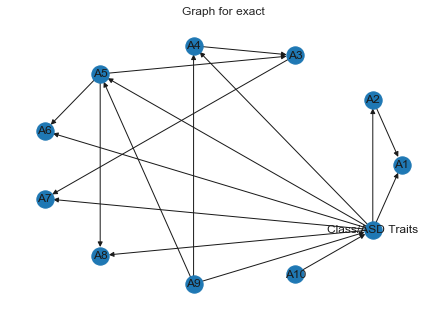

0.7924263674614306 for exact


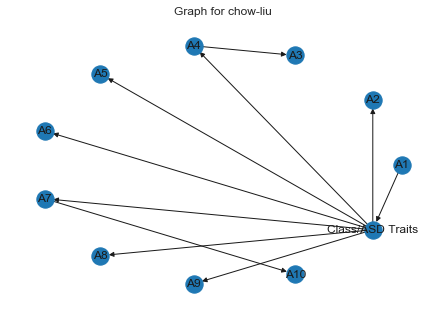

0.7808599167822469 for chow-liu


In [30]:
from DAG import *
from pomegranate import *
from sklearn.metrics import accuracy_score, f1_score
import networkx as nx
import matplotlib.pyplot as plt




#creating a BN from data
algorithms = ['exact','chow-liu']
for algo in algorithms:
    model = BayesianNetwork.from_samples(X = train, algorithm=algo, state_names = COL_NAMES)
    graph = make_graph_from_tuples(model.structure)
    draw_graph(graph, title = "Graph for " + algo)
    print(test_accuracy(model, test), "for", algo)

    


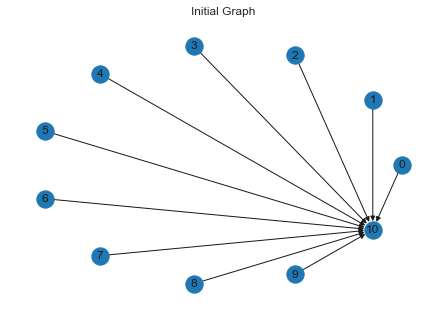

0 10 20 30 40 50 60 

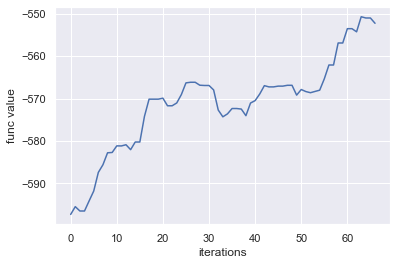

In [33]:
from SA import *
from DAG import *
_, cols = read_data('../dataset/Toddler Autism dataset July 2018.csv', train_flag= True)
cols = len(cols)

matrix = np.zeros((cols, cols))
for i in range(cols - 1):
    matrix[i, cols - 1] = 1

test = DAG(matrix, name = '../dataset/Toddler Autism dataset July 2018.csv')

sa = Simulated_Annealing(test, True, 1, alpha = 0.9)
draw_graph(test.graph, re_label = False, title = "Initial Graph")
best_sol, best_score, path = sa.finding_optimal(debug = True)

In [34]:
scores = []
iterations = []
for i in range(len(path)):
    if not (i % 20):
        print(i, end = " ")
        scores.append(path[i].test_MSE())
        iterations.append(i)
        




0 20 40 60 

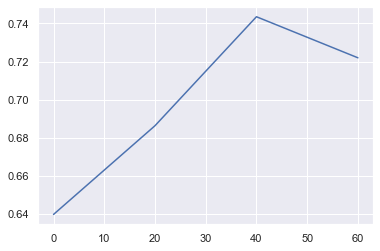

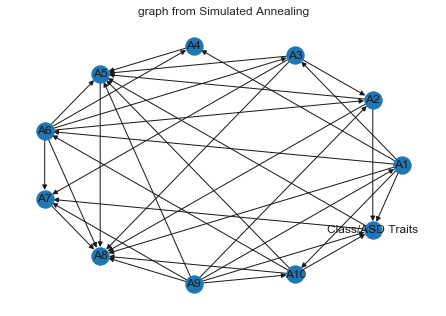

0.7006172839506173 best model found using SA


In [35]:
plt.plot(iterations, scores)
plt.show()

draw_graph(best_sol.graph, title = "graph from Simulated Annealing", re_label = False)
print(best_sol.test_MSE(), "best model found using SA")

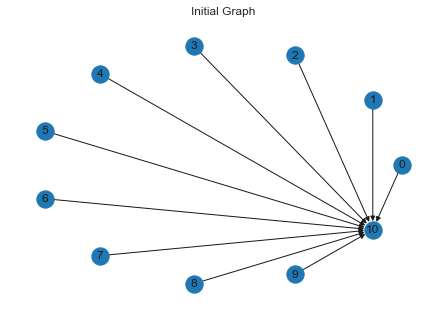

0 10 20 30 40 50 58
58


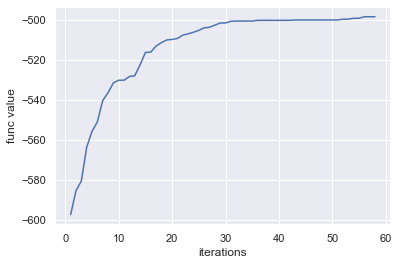

In [37]:
from HC import *
from DAG import *
_, cols = read_data('../dataset/Toddler Autism dataset July 2018.csv', train_flag= True)
cols = len(cols)

matrix = np.zeros((cols, cols))
for i in range(cols - 1):
    matrix[i, cols - 1] = 1

test = DAG(matrix, name = '../dataset/Toddler Autism dataset July 2018.csv')

sa = HillClimbing(test, True, 1)
draw_graph(test.graph, re_label = False, title = "Initial Graph")
best_sol, best_score, path = sa.finding_optimal(debug = True)

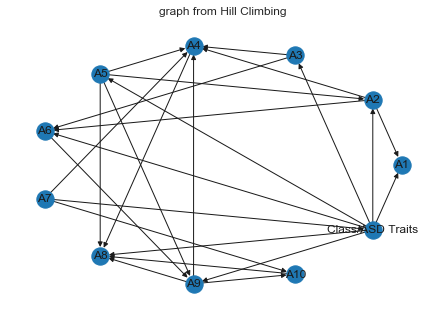

0.7649769585253456 best model found using Hill Climbing


In [38]:
draw_graph(best_sol.graph, title = "graph from Hill Climbing", re_label = False)
print(best_sol.test_MSE(), "best model found using Hill Climbing")